This notebook shows how to get a colour palette from an image and show some possible design inpirations using that colour palette.


In [1]:
%pip install validators

In [2]:
from google.colab.patches import cv2_imshow
from urllib.request import urlopen
import numpy as np
import validators
import cv2
from IPython.display import IFrame

# we can decide how many colours we want to extract
NUM_COLOUR_IN_PALETTE = 5

In [3]:
# get image from URL or local path
# for colab, image should be accessible (like in /content/abc.jpg)
def get_image(path):
    if (validators.url(path)):
        resp = urlopen(path)
        temp = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(temp, cv2.IMREAD_COLOR) # The image object
    else:
        image = cv2.imread(path)
    return image

In [4]:
# code adapted from
# https://github.com/codegiovanni/Dominant_colors/blob/main/dominant_colors.py

def create_bar(height, width, color):
    bar = np.zeros((height, width, 3), np.uint8)
    bar[:] = color
    red, green, blue = int(color[2]), int(color[1]), int(color[0])
    return bar, (red, green, blue)

# can pass in how many colours we want to extract, default is 5
def get_colour_palette(img, num_colour=NUM_COLOUR_IN_PALETTE):

    height, width, _ = np.shape(img)
    # print(height, width)

    data = np.reshape(img, (height * width, 3))
    data = np.float32(data)

    number_clusters = num_colour
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness, labels, centers = cv2.kmeans(data, number_clusters, None, criteria, 10, flags)

    font = cv2.FONT_HERSHEY_SIMPLEX
    bars = []
    rgb_values = []

    for index, row in enumerate(centers):
        bar, rgb = create_bar(200, 200, row)
        bars.append(bar)
        rgb_values.append(rgb)

    img_bar = np.hstack(bars)
    hex = []

    for index, row in enumerate(rgb_values):

        color_in_hex = f'{row[0]:02x}{row[1]:02x}{row[2]:02x}'
        image = cv2.putText(img_bar, f'{index + 1}. {color_in_hex}', (5 + 200 * index, 200 - 10),
                            font, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
        # print(f'{index + 1}. RGB{row}.  #{color_in_hex}')
        hex.append( color_in_hex )

    return  img_bar, hex, rgb_values


In [5]:
# get inpiration from one of the design sites
def get_url_for_design_inspiration(color_in_hex_list):
    hex_str = '-'.join(color_in_hex_list)
    # print(hex_str)

    temp_url = "https://www.designspiration.com/palette/" + hex_str
    return temp_url


In [6]:
def show_image_and_palette(image, show_palette=False, num_colour=NUM_COLOUR_IN_PALETTE):
    cv2_imshow(image1)
    hex, rgb = None, None
    if (show_palette):
        image_bar, hex, rgb = get_colour_palette(image1, num_colour)
        cv2_imshow(image_bar)


    return hex, rgb

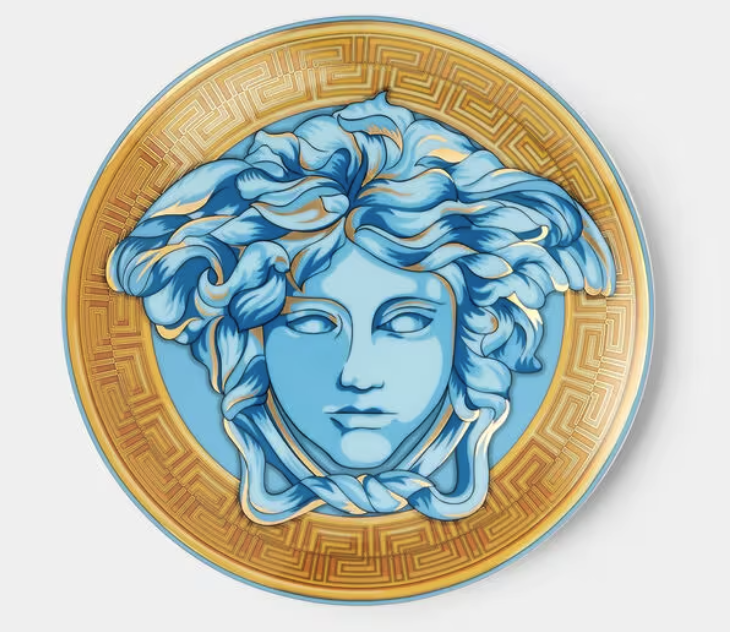

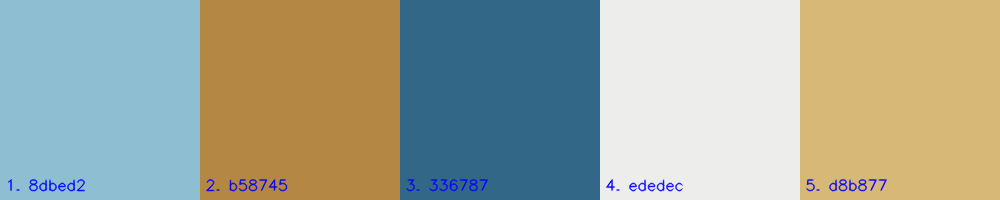

In [7]:
image1 = get_image('/content/versace_plate.png')
hex, __= show_image_and_palette(image1, True, 5)

In [8]:
url1 = get_url_for_design_inspiration(hex)
print(url1)
IFrame(url1, width=1000, height=1000)

https://www.designspiration.com/palette/8dbed2-b58745-336787-ededec-d8b877


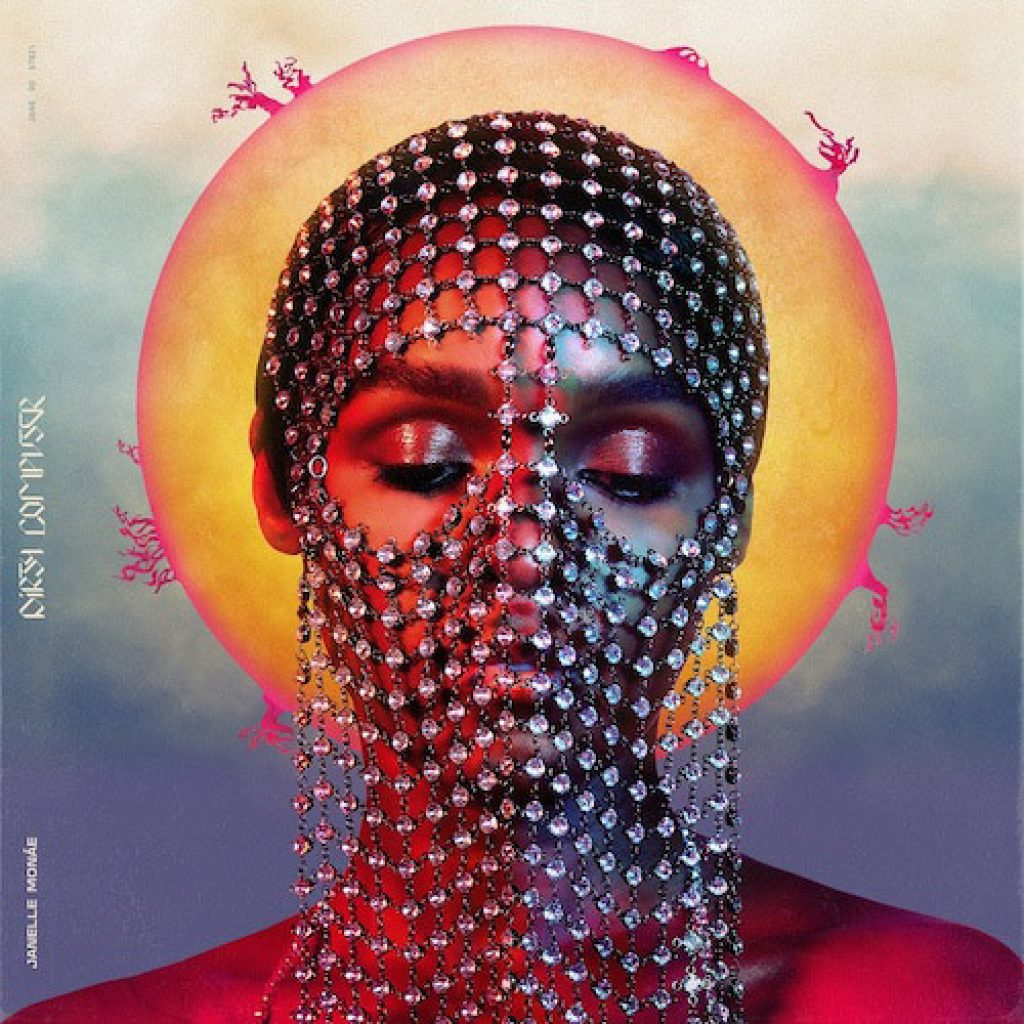

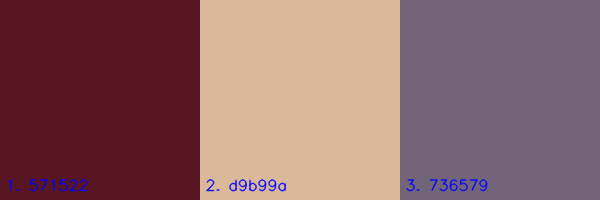

In [9]:
image1 = get_image('https://www.udiscovermusic.com/wp-content/uploads/2015/10/Janelle-Mona%CC%81e-Dirty-Computer--1024x1024.jpg')
hex, __= show_image_and_palette(image1, True, 3)


In [10]:
url2 = get_url_for_design_inspiration(hex)
print(url2)
IFrame(url2, width=1000, height=1000)

https://www.designspiration.com/palette/571522-d9b99a-736579
